# 1st of lets check our enivronment with a basic "hello world" Program

In [ ]:
print('hello world')

hello world


# Objective: Setting up a environment for model development

**For that we need to install 1. Anaconda Navigator, 2.Jupiter Notebook, 3.Visual Studio Code for Flask operation, 4.Render for hosting.**

 ## Aim : Given a person’s credit-related information, build a machine learning model that can classify the credit score.

 A ML model has also been built so that user can enter their details to know what Category their Credit Score lies in.

## **Table of Contents**

**1.Importing.**

**2.Reading Data.**

**3.Data Exploration.**

**4.Data Cleaning.**

**5.Data Preprocessing.**

**6.Modeling and Evaluation.**

# BUILD a CLASSIFICATION MODEL with Highest Accuracy, Precison and Recall score.

## Import the required libraries.

In [ ]:
import pandas as pd                                                      #FOR Pandas
import numpy as np                                                       #FOR Numpy
import matplotlib.pyplot as plt                                          #FOR PLOTTING
import statistics as stat                                                #FOR STATISTICS (MEAN, MODE AND MEDIANS) IF REQUIRED
import seaborn as sns                                                    #FOR PLOTTING
from sklearn.preprocessing import LabelEncoder                           #For encoding catergoircal values object data
from sklearn.preprocessing import StandardScaler                         #FOR STANDARD SCALING
from sklearn.model_selection import train_test_split                      #FOR TRAIN TEST SPLIT
from sklearn.linear_model import LogisticRegression                      #FOR LOGISTIC REGRESSION
from sklearn.tree import DecisionTreeClassifier                          #DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                      #RandomForestClassifier
from sklearn.svm import SVC                                              #for svm-svc classification
from sklearn.neighbors import KNeighborsClassifier                       #for knn classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix        #classifiers metrics

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Importing the required dataset into our colab environment.

In [ ]:
data=pd.read_csv('/content/credit.csv')

**Lets analyze the dataset using head() and tail() functions**

In [ ]:
data.head() # checking the rows data of first 5 rows

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
data.tail() # checking the rows data of last 5 rows

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


# EDA (Exploratory Data Analysis)

**Know the shape of the dataset like: 1st:Rows then Columns.**

In [ ]:
data.shape   #The dataset contains 100000 rows of information and 28 columns/features.

(100000, 28)

**Taking the information function of the daatset.**

In [ ]:
data.info() #Gives index, column/feature name, NON-NULL count and Dataypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

**statistical data analysis describe function()**      #FUNCTION TO INVOKE statistical data

In [ ]:
data.describe()      #FUNCTION TO INVOKE COUNT,MEAN,STANDARD DEVIATION,MIN AND MAX VALUES collectivelly called as statistical data analysis

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


**Analyze data columns and display it on screen**

In [ ]:
data.columns    #function to display all columns used to easier access and copying of data/feature when and upon data manipulation.

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

**Analyze each features data-types single_handly**

In [ ]:
data.dtypes   # Displays the data types of each feature.

,0
ID,int64
Customer_ID,int64
Month,int64
Name,object
Age,float64
SSN,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64


In [ ]:
data.size   # the multiplied value of total row into total columns.

2800000

# Function to check whether there is any duplicates within the data.

In [ ]:
data.duplicated().sum()

0

### no duplicates was found within the dataset.

# **DATA VISUALIZATIONS**

## **1.Univariate Visualizations**

# 1.1.'Count' vs 'Month'  

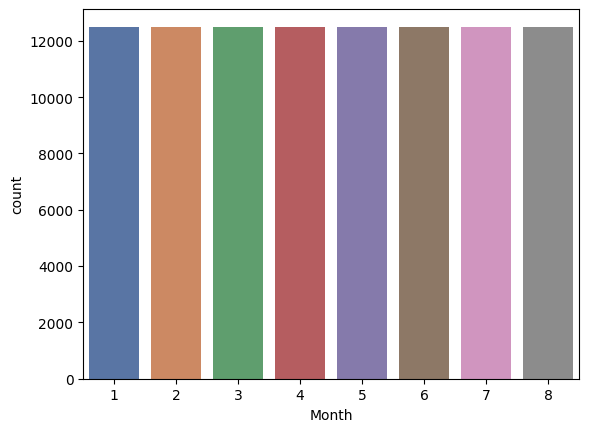

In [ ]:
sns.countplot(x = data['Month'],palette = "deep");

# 1.2.'Count' Vs 'Occupation'

In [ ]:
data['Occupation'].nunique()

15

In [ ]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [ ]:
data['Occupation'].value_counts()

,count
Occupation,
Lawyer,7096
Engineer,6864
Architect,6824
Mechanic,6776
Scientist,6744
Accountant,6744
Developer,6720
Media_Manager,6720
Teacher,6672


# 1.3.Histogram for Age

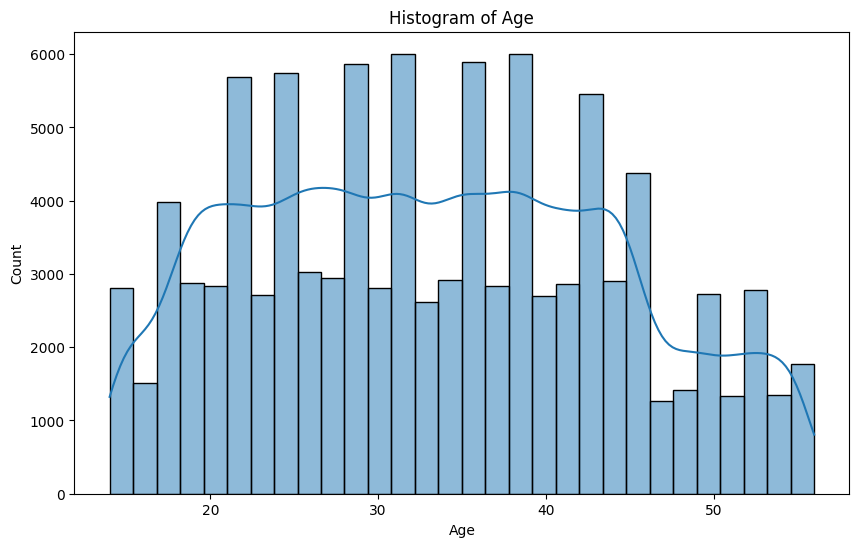

In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 1.4.Box Plot for Annual_Income

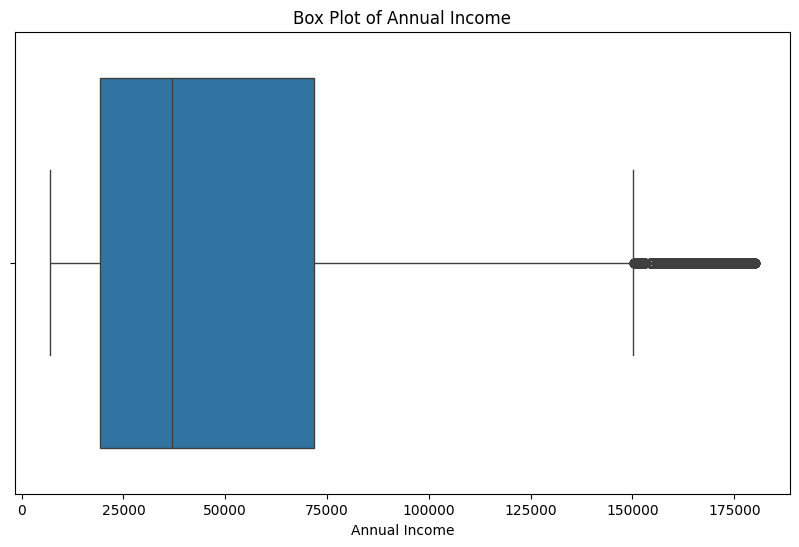

In [ ]:
# Box Plot for Annual Income
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Annual_Income'])
plt.title("Box Plot of Annual Income")
plt.xlabel("Annual Income")
plt.show()

**Here we find Outliers within the feature values.**

# 1.5.Histogram for Occupation

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Scientist'),
  Text(1, 0, 'Teacher'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Entrepreneur'),
  Text(4, 0, 'Developer'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Media_Manager'),
  Text(7, 0, 'Doctor'),
  Text(8, 0, 'Journalist'),
  Text(9, 0, 'Manager'),
  Text(10, 0, 'Accountant'),
  Text(11, 0, 'Musician'),
  Text(12, 0, 'Mechanic'),
  Text(13, 0, 'Writer'),
  Text(14, 0, 'Architect')])

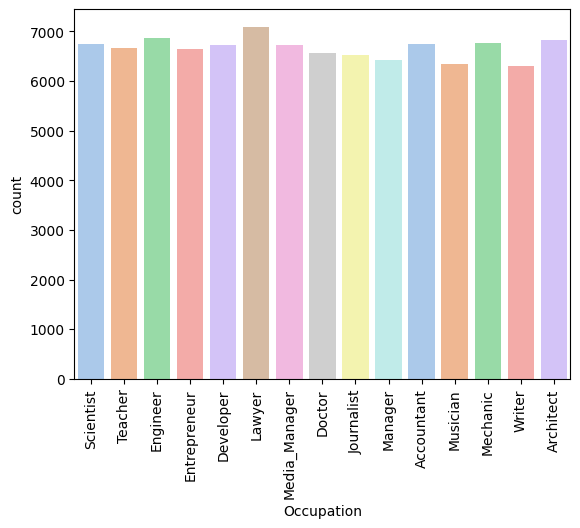

In [ ]:
sns.countplot(x = data['Occupation'],palette = "pastel");
plt.xticks(rotation = 90)

# 1.6.Histogram for 'Count' Vs 'Credit_Mix'

In [ ]:
data['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,45848
Good,30384
Bad,23768


In [ ]:
data['Credit_Mix'].nunique()

3

In [ ]:
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

([0, 1, 2], [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Bad')])

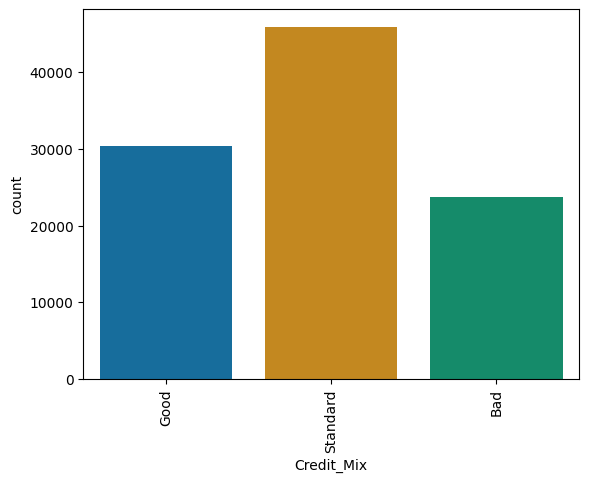

In [ ]:
sns.countplot(x = data['Credit_Mix'],palette = "colorblind");
plt.xticks(rotation = 90)

# 1.7.Histogram for'Count' Vs 'Payment_of_Min_Amount'

### Payment_of_Min_Amount

In [ ]:
data['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


In [ ]:
data['Payment_of_Min_Amount'].nunique()

3

# Replace arbitarty values with specific values

**1.Payment_of_Min_Amount**

In [ ]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

**Here there are 3 possibilities. Thus OPTION "NM" should be changed into No.(i.e a specfic value.)**

**This feature requires no further changes.**

## **1.8.Histogram for Payment of min amount**

([0, 1, 2], [Text(0, 0, 'No'), Text(1, 0, 'NM'), Text(2, 0, 'Yes')])

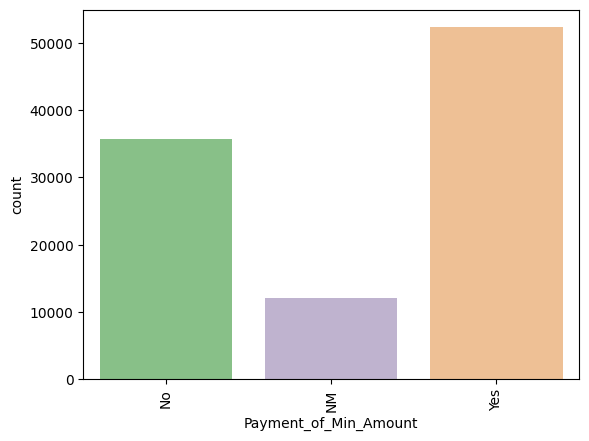

In [ ]:
sns.countplot(x = data['Payment_of_Min_Amount'],palette = "Accent");
plt.xticks(rotation = 90)

**See here the feature should be either yes or no. Thus the Condition NM should be converted into no category.**

**2.Payment_Behaviour Column**

In [ ]:
data['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,28616
High_spent_Medium_value_payments,19738
High_spent_Large_value_payments,14726
Low_spent_Medium_value_payments,14399
High_spent_Small_value_payments,11764
Low_spent_Large_value_payments,10757


# 1.9.Histogram for 'Count' Vs 'Credit score'

In [ ]:
data['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


([0, 1, 2], [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Poor')])

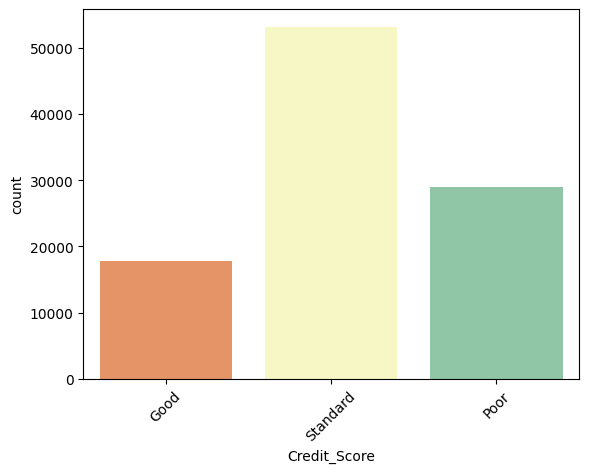

In [ ]:
sns.countplot(x = data['Credit_Score'],palette = "Spectral");
plt.xticks(rotation = 45)

# **2. Bivariate Visualizations**

# 2.1.**Scatter Plot for Annual_Income vs Monthly_Inhand_Salary**

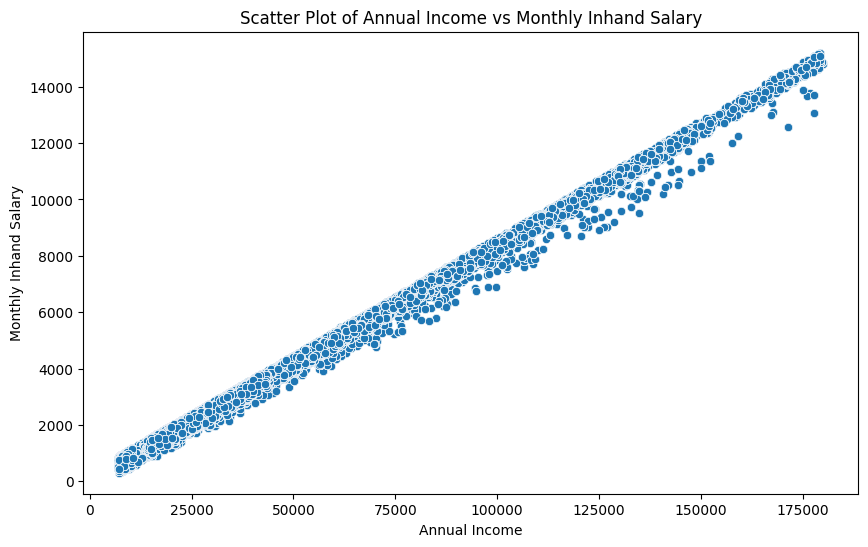

In [ ]:
# Scatter Plot for Annual Income vs Monthly Inhand Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Monthly_Inhand_Salary', data=data)
plt.title("Scatter Plot of Annual Income vs Monthly Inhand Salary")
plt.xlabel("Annual Income")
plt.ylabel("Monthly Inhand Salary")
plt.show()

**Here we can see a linear progression Since as Annual income increases Monthly in hand also increases (Obviously).**

# **2.2.Box Plot for Occupation vs Annual_Income

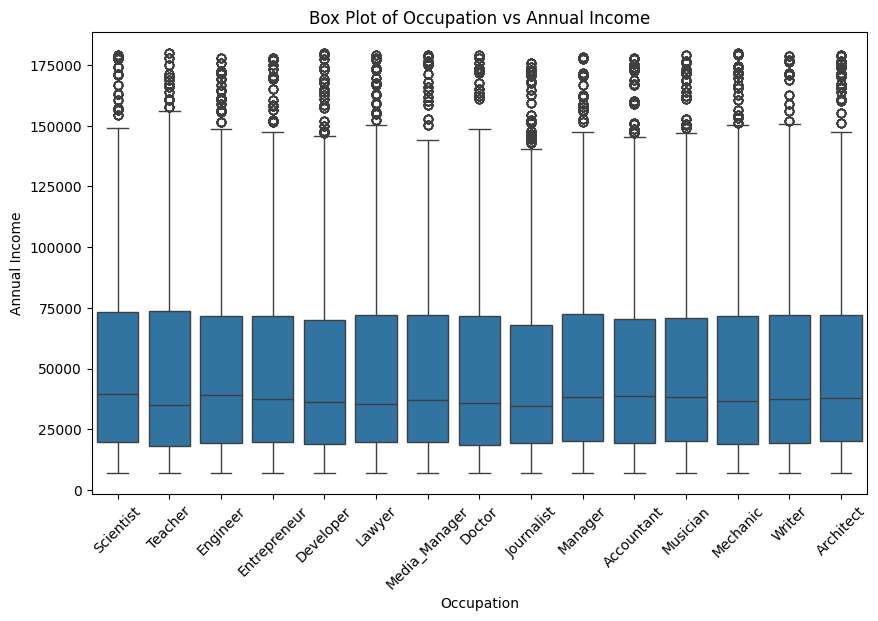

In [ ]:
# Box Plot for Occupation vs Annual Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Annual_Income', data=data)
plt.title("Box Plot of Occupation vs Annual Income")
plt.xlabel("Occupation")
plt.ylabel("Annual Income")
plt.xticks(rotation=45)
plt.show()

**There are ouliers in each occupation showing there is high ranges of differences between each persons.**

# 3. Trivariate Visualizations

# **3.1.Bubble Chart for Annual_Income, Monthly_Inhand_Salary, and Num_Bank_Accounts**

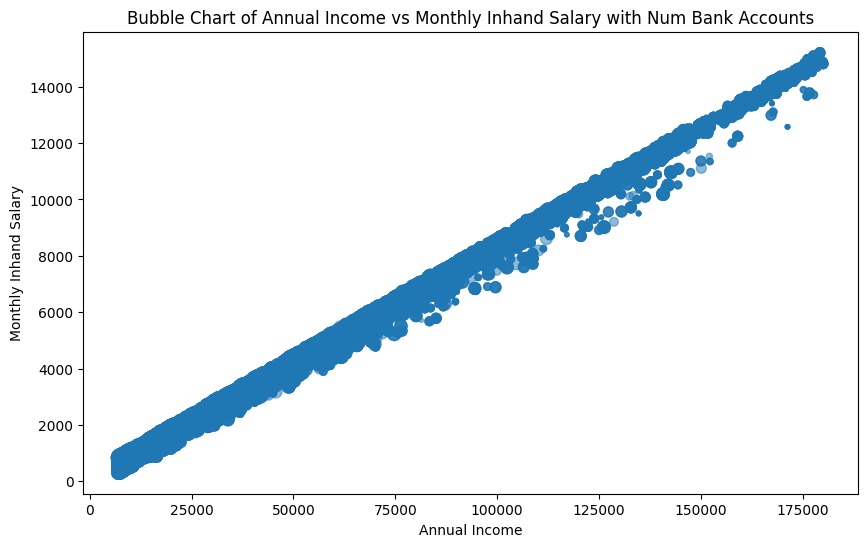

In [ ]:
# Bubble Chart for Annual Income, Monthly Inhand Salary, and Num Bank Accounts
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual_Income'], data['Monthly_Inhand_Salary'], s=data['Num_Bank_Accounts']*10, alpha=0.5)
plt.title("Bubble Chart of Annual Income vs Monthly Inhand Salary with Num Bank Accounts")
plt.xlabel("Annual Income")
plt.ylabel("Monthly Inhand Salary")
plt.show()

**if the income is high  the inhand salary is high thus the number of bank accounts is more.**

# 3.2.Pair Plot for Age, Annual_Income, and Monthly_Inhand_Salary

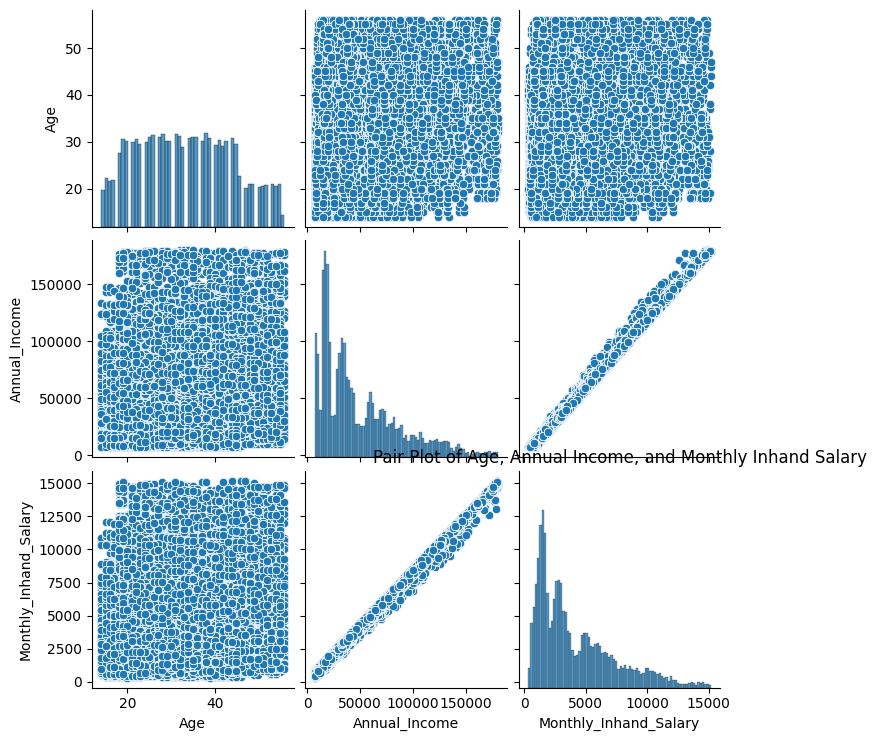

In [ ]:
# Pair Plot for Age, Annual Income, and Monthly Inhand Salary
sns.pairplot(data[['Age', 'Annual_Income', 'Monthly_Inhand_Salary']])
plt.title("Pair Plot of Age, Annual Income, and Monthly Inhand Salary")
plt.show()

**Some specific inferences 1.Correlation Between Variables, 2.Distribution of Each Variable, 3.Age and Income Relationship, 4.Monthly_inhand_Salary vs. Annual Income, 5.Data Clusters.**

# 4. Multivariate Visualizations

# **4.1.Pair Plot with Hue for Credit_Score.**

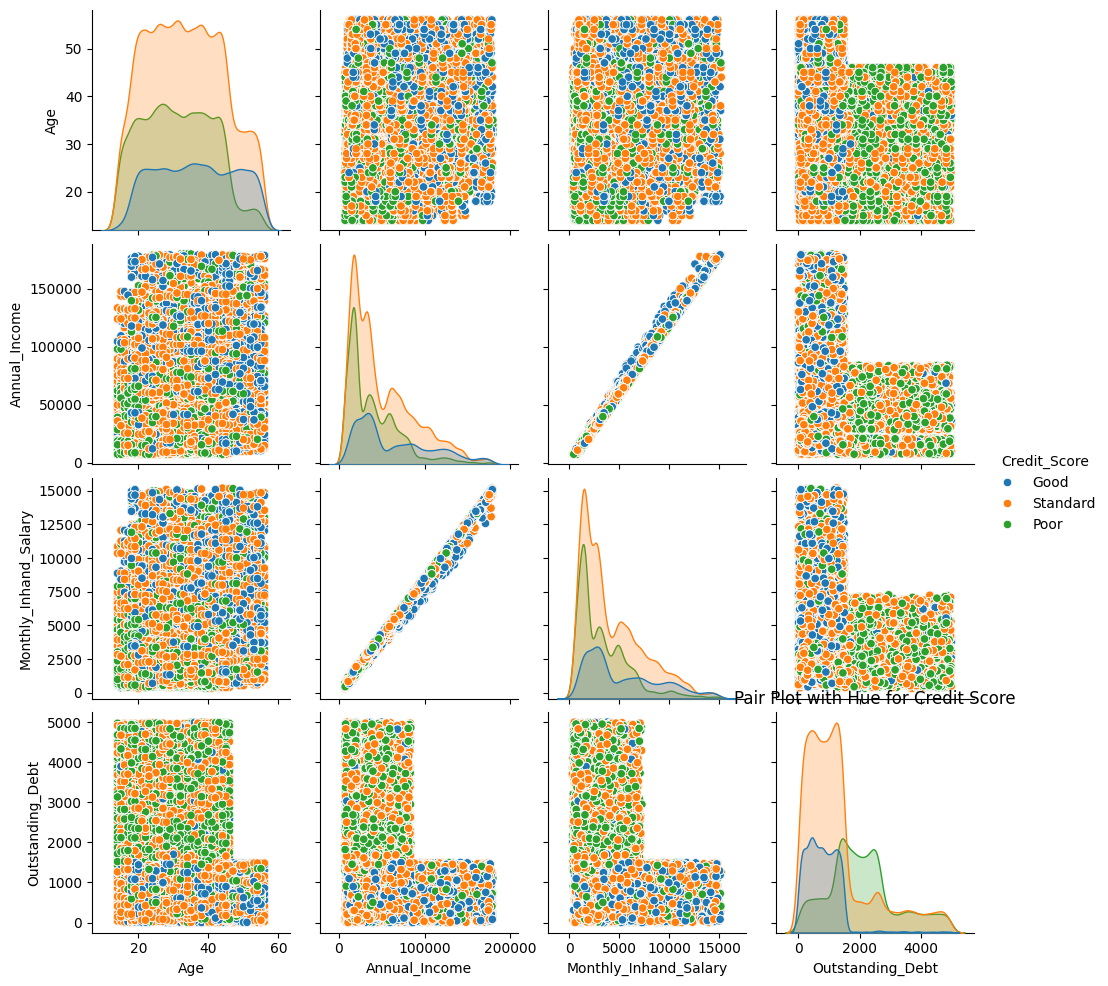

In [ ]:
# Pair Plot with Hue for Credit Score
sns.pairplot(data, hue='Credit_Score', vars=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt'])
plt.title("Pair Plot with Hue for Credit Score")
plt.show()

**We can infer relationship between features (Linear, non-Linear, no relationship). Then separation of credit scores aiding in prediction of credit_score. Also helps to find out and Identifying Overlaps, Anomalies, Distribution and Density.**

# 4.2.Facet Grid for Occupation vs Annual_Income with Credit_Score

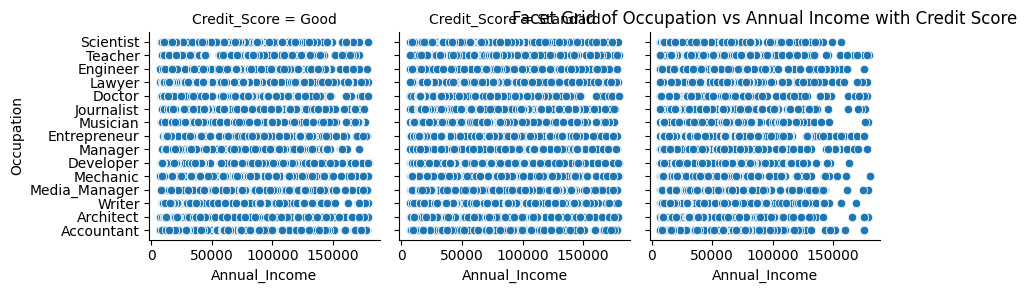

In [ ]:
# Facet Grid for Occupation vs Annual Income with Credit Score
g = sns.FacetGrid(data, col='Credit_Score')
g.map(sns.scatterplot, 'Annual_Income', 'Occupation')
plt.title("Facet Grid of Occupation vs Annual Income with Credit Score")
plt.show()

**This visualizations helps us to understand the following:- 1.Income Distribution by Occupation, 2.Credit Score Distribution. 3.Income and Credit Score Relationship, 4.Occupational Segmentation.**

# Further Investigation.

### Count VS Type of Loan

In [ ]:
data['Type_of_Loan'].value_counts().head(10)

,count
Type_of_Loan,
No Data,11408
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
Payday Loan,1200
Mortgage Loan,1176
Auto Loan,1152


In [ ]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [ ]:
data['Type_of_Loan'].nunique()      #Factor to be considered for feature engg. and analyse properly....Priority high

6261

In [ ]:
data['Num_Credit_Card'].unique()   # see here there is a value called zero we have to change that because there is no credit without credit cards.

array([ 4.,  5.,  1.,  7.,  6.,  8.,  3.,  9.,  2., 10., 11.,  0.])

In [ ]:
data['Num_Credit_Card'].nunique()

12

In [ ]:
data['Num_Bank_Accounts'].unique()  #inorder to get a credit card you need a bank account so we need to change this zeo also

array([ 3.,  2.,  1.,  7.,  4.,  0.,  8.,  5.,  6.,  9., 10., 11.])

In [ ]:
data['Num_Bank_Accounts'].nunique()

12

In [ ]:
data['Num_of_Loan'].nunique()

10

In [ ]:
data['Num_of_Loan'].unique()

array([4., 1., 3., 0., 2., 7., 5., 6., 8., 9.])

In [ ]:
data['Num_of_Loan'].value_counts()

,count
Num_of_Loan,
3.0,15752
2.0,15712
4.0,15456
0.0,11408
1.0,11128
6.0,8144
7.0,7680
5.0,7528
9.0,3856


In [ ]:
data['Type_of_Loan'].value_counts()   #Data analysed and found out that to take 1st 10 features within the feature and create additional columns.

,count
Type_of_Loan,
No Data,11408
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
...,...
"Not Specified, Mortgage Loan, Auto Loan, and Payday Loan",8
"Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan",8
"Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan",8


In [ ]:
data['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


In [ ]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
data['Credit_Score'].nunique()

3

## Conculsions from my investigations from EDA, data studying and visuaizations.

1. Upon studying the dataset:- **Features/columns such as ID, Customer_ID, Month, Name, Age, SSN, Occupation possess uniques values set and is different for all. Hence we can drop these features.**<br>


2. The column/feature **Num_Credit_Card has zero as its value. I am assuming that in-order to have credit score or get credit one has to avail atleast one credit card. Hence the Num_Credit_Card should be one to have a credit score. So set Num_Credit_Card>= 1.**<br>   


3. Feature Engineering is essential for the column/Feature **Type_of_Loan we need to sub-divide it into 9 additional columns.**<br>


4. Feature/column **Payment_of_Min_Amount has 3 unique values, they are "Yes", "NO", "NM". It is sure that a person who takes the credit should atleast deposit/pay-back the minimum amount. Hence "NA" values should be converted to No option.**<br>


5. **Target column/Target feature is biased. Which may even cause problem while ML development and deployement.**<br>

# DATA PRE-PROCESSING

**1.DATA CLEANING**

As the first part of cleaning some features are being reduced. As established in the above conculsions listed above.

In [ ]:
data.drop('ID',axis=1,inplace=True)
data.drop('Customer_ID',axis=1,inplace=True)
data.drop('Month',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)
data.drop('Age',axis=1,inplace=True)
data.drop('SSN',axis=1,inplace=True)
data.drop('Occupation',axis=1,inplace=True)

Features/columns such as **ID, Customer_ID, Month, Name, Age, SSN, Occupation** possess uniques values set and is different for all. Hence we can drop these features.

## Divide type of loans into 8 different columns

**Feature engineering process The idea is to take the 1st 10 unique data from the feature 'Type_of_Loan' and to
generate additional features/columns into the dataset to enhance the capabilites of the data.**

### index is taken from 2 because "No DATA and NOT specified" are not considered....

# Feature Engineering the feature 'Type_of_Loan'

In [ ]:
for i in data['Type_of_Loan'].value_counts().head(10).index[2:]:
    data[i] = data['Type_of_Loan'].str.contains(i).astype(str)

data.drop('Type_of_Loan', axis=1, inplace=True)

### In the above code the index is taken from 2 since '0' represents 'no data' and 1 represents 'Not specified' I think its not relevant in the context of data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

## Allocating Credit Card number owned to atleast one.

In [ ]:
data['Num_Credit_Card'].replace(0,1,inplace=True)  #This is done on the assumption that credit is given through the use of cards.

### 'Payment_of_Min_Amount' feature had 3 unique values. Making it into 2 unique values

In [ ]:
data['Payment_of_Min_Amount'].replace("NM","No",inplace = True) # "NM" values are converted into "No" values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

# DATA PRE-PROCESSING

## 1.check for null values

In [ ]:
data.isna().sum()    #function to invoke sum of null values in each columns

,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0


### NO NULL VALUES WITH IN THE DATASET.

In [ ]:
data.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50505.123449,4197.270835,5.368820,5.533710,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,38299.422093,3186.432497,2.593314,2.066757,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,7005.930000,303.645417,0.000000,1.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


# 2.Checking for OUTLIERS

### We need to check each feature skewness i.e if bell shaped it needs to be Z - score test else if skewed IQR(Interquartile Range Test)

In [ ]:
freqgraph = data.select_dtypes(include=['float64', 'int64'])

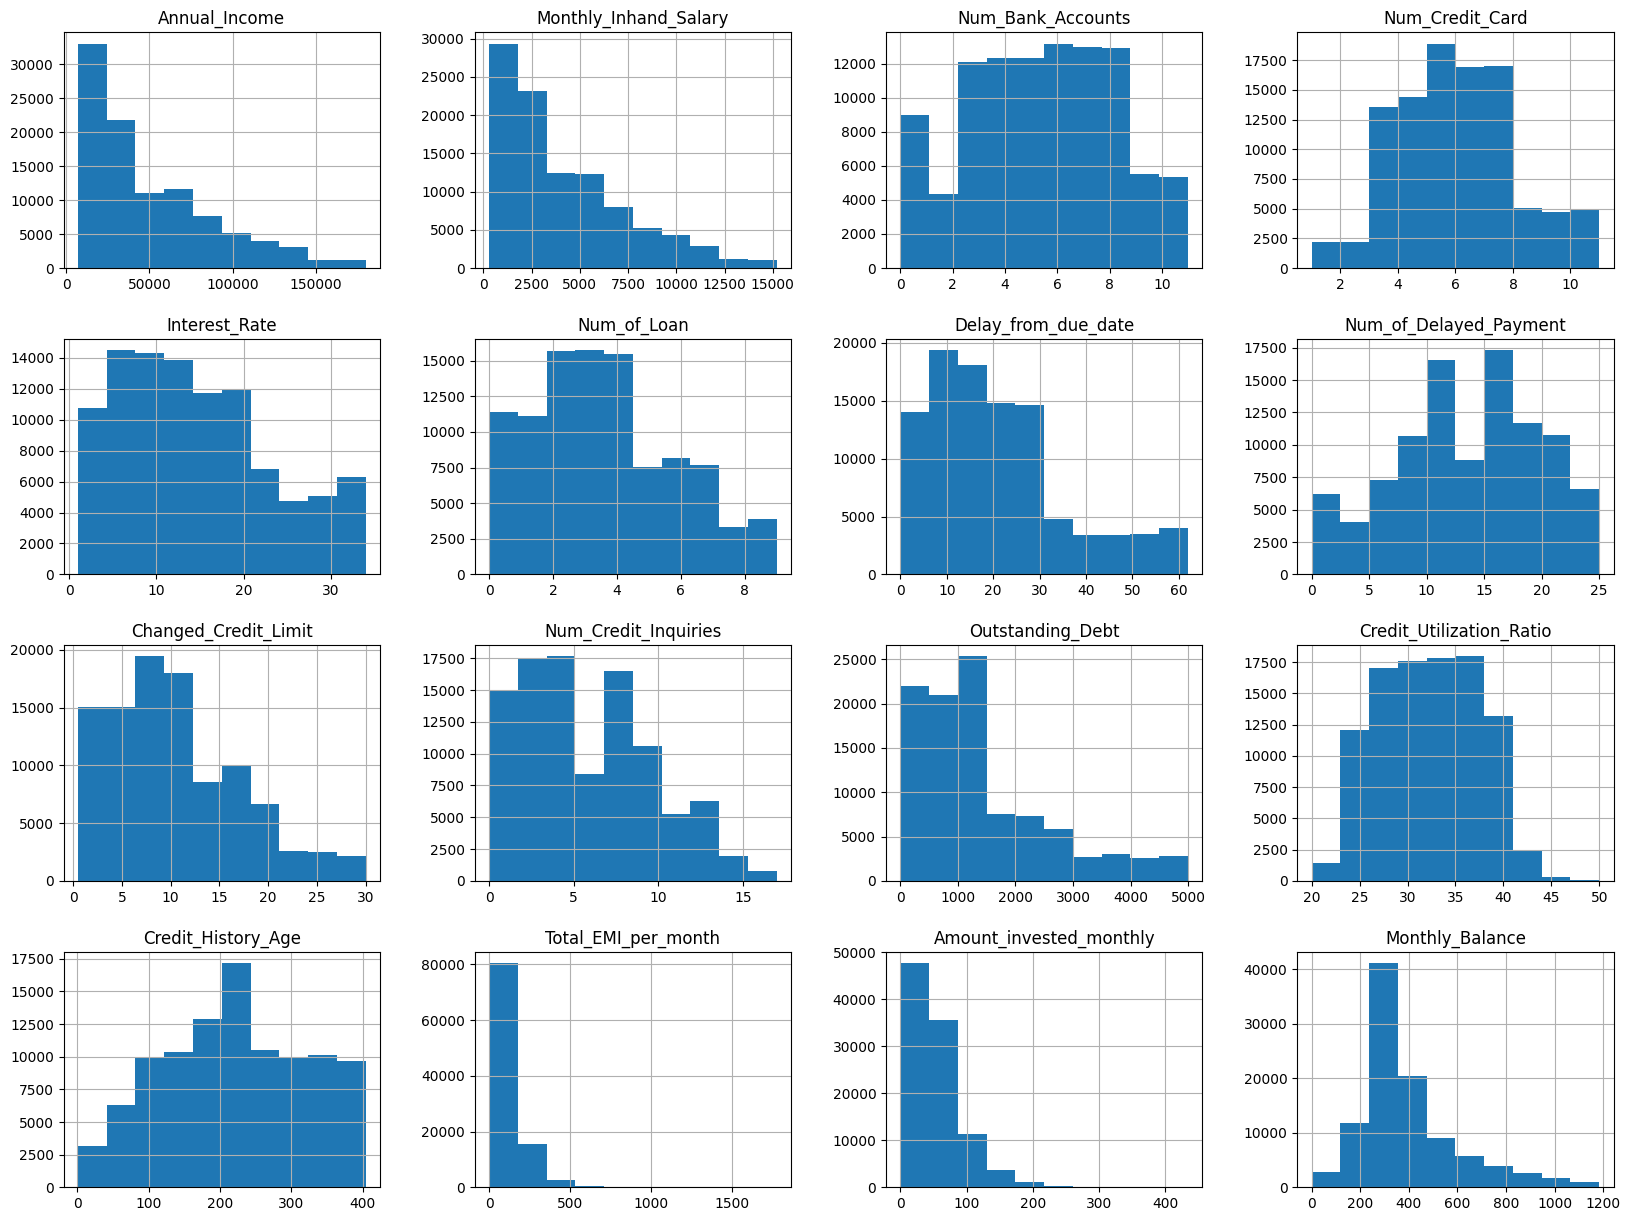

In [ ]:
freqgraph.hist(figsize=(20,15))
plt.show()

All GRAPHS ARE Skewed.

**Upon analysing the outliers are all genuine and hence cannot be subjected to IQR tests hence I perform log transformation.**

In [ ]:

# List of columns to be log transformed
columns_to_transform = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
    'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Applying log transformation
for col in columns_to_transform:
    data[col] = np.log1p(data[col])  # log1p is used to handle zero values


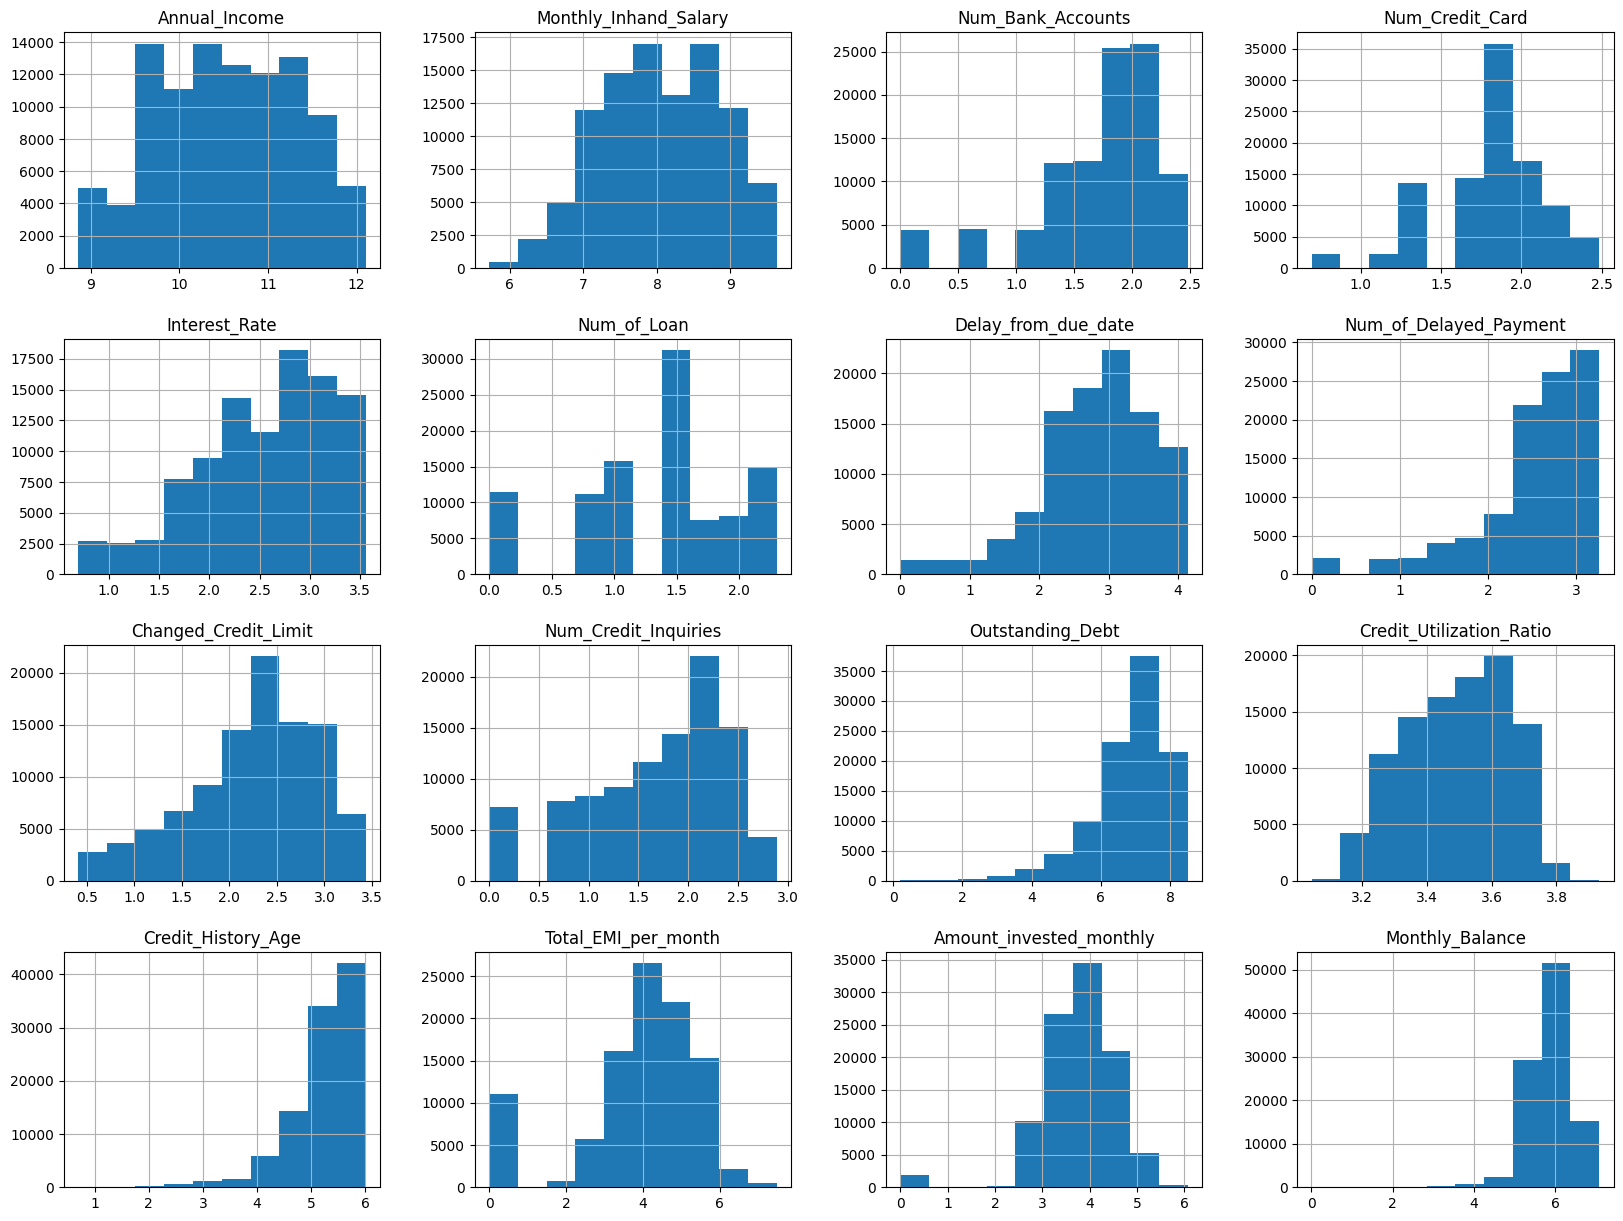

In [ ]:
freqgraph = data.select_dtypes(include=['float64', 'int64'])
freqgraph.hist(figsize=(20,15))
plt.show()

**checking for outliers again of the normalized/transformed dataset.**

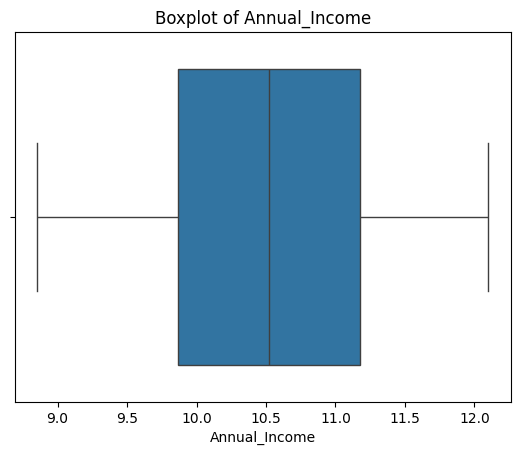

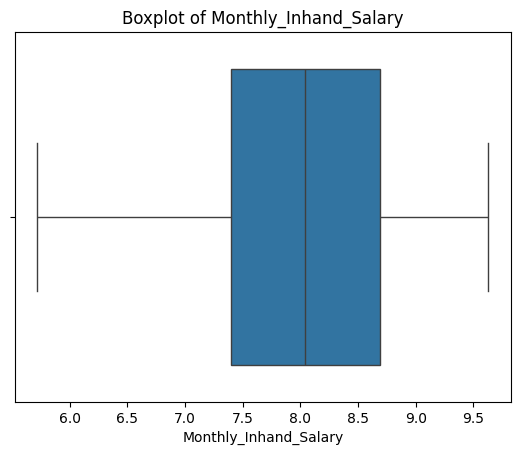

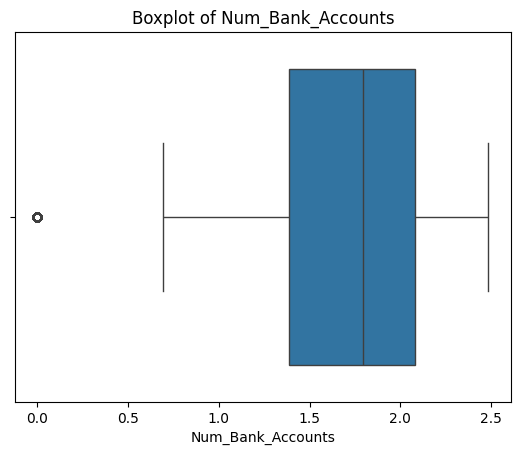

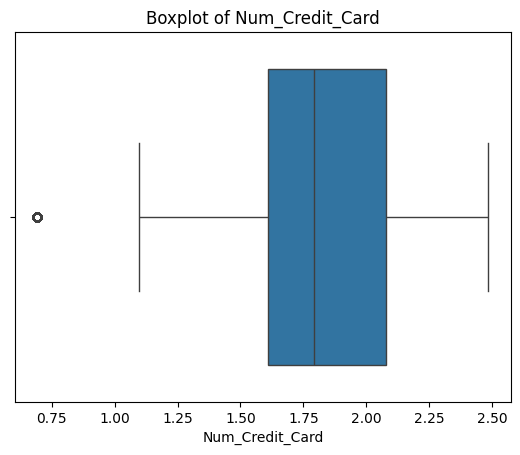

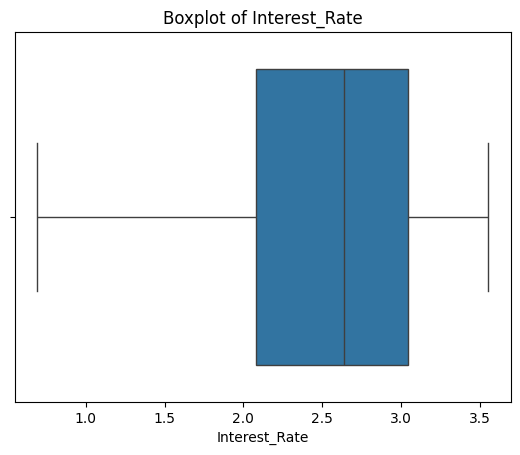

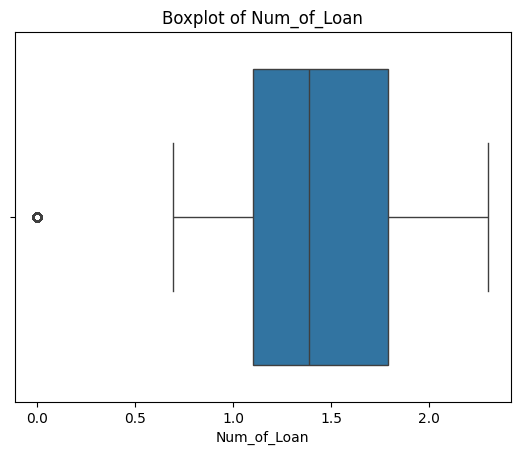

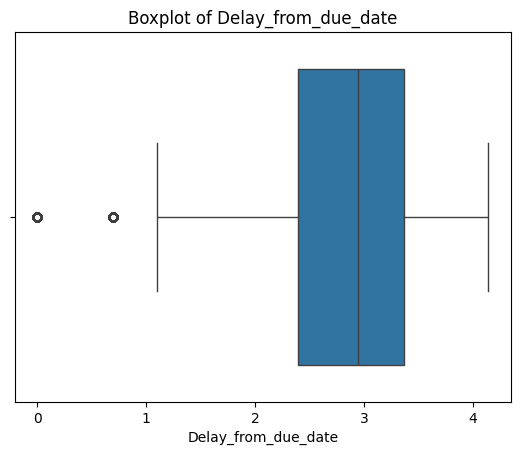

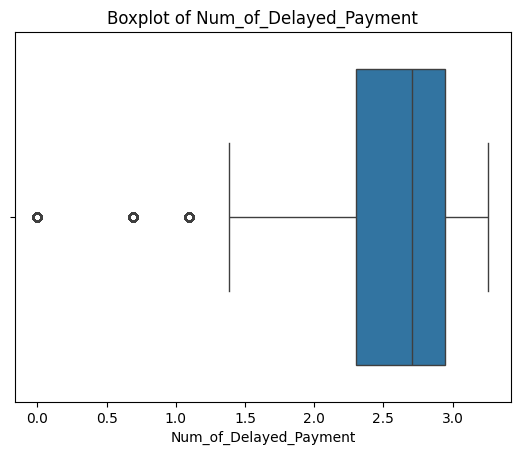

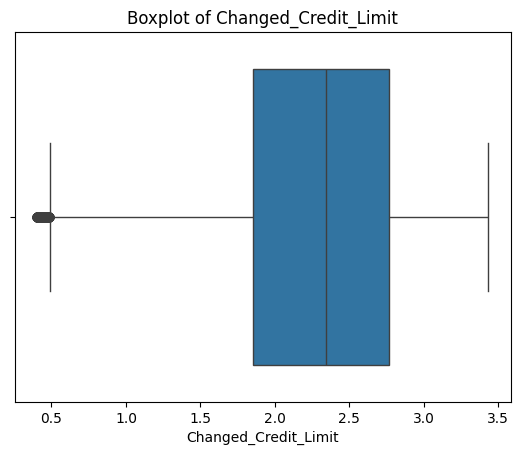

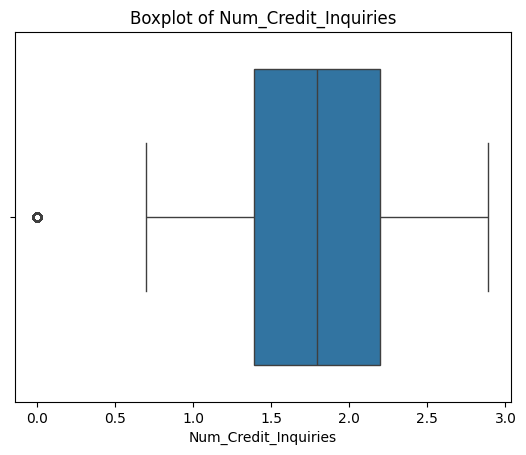

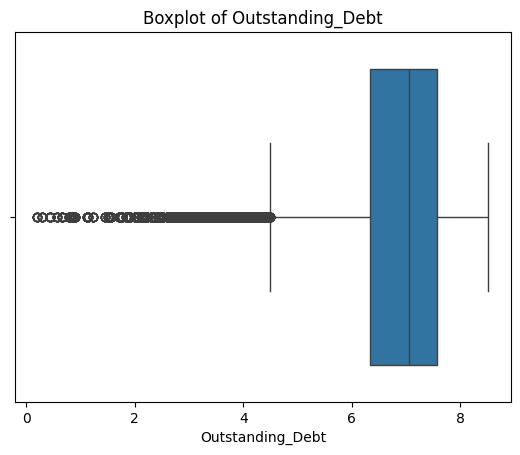

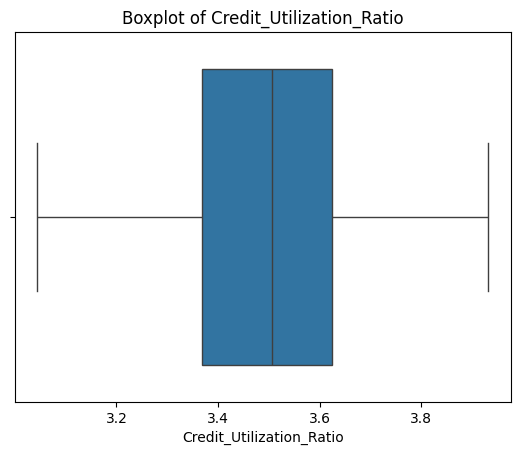

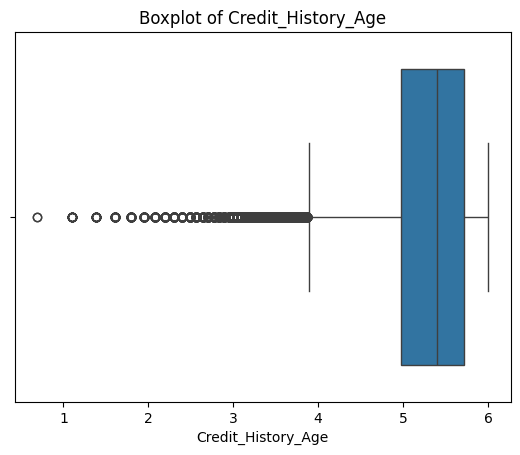

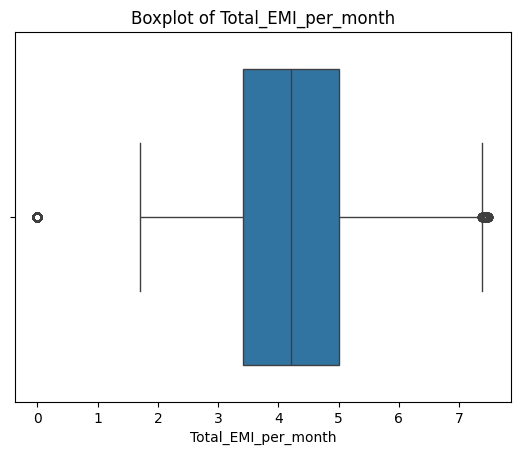

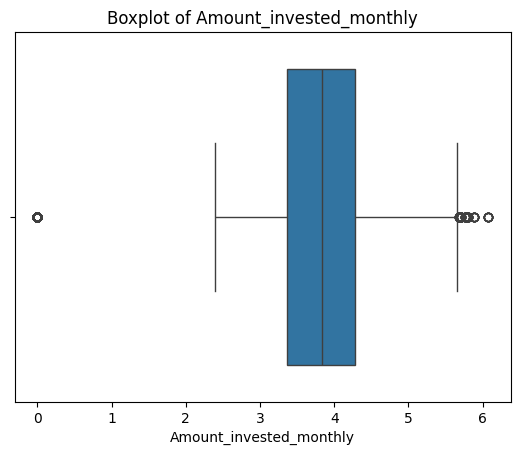

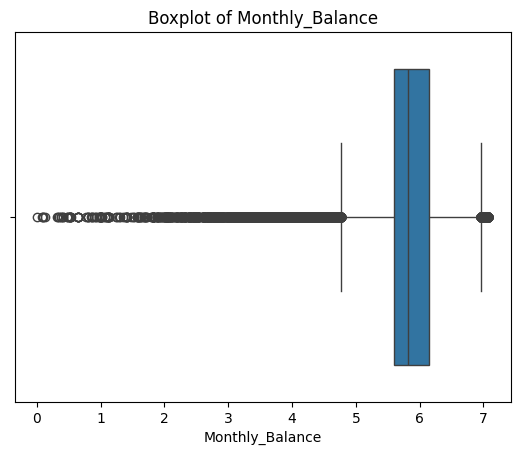

In [ ]:
columns_to_transform = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
    'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
# Identify any remaining outliers
for col in columns_to_transform:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()



In [ ]:
from scipy.stats import skew
# List of columns to be log transformed
columns_to_transform = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
    'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Applying log transformation
for col in columns_to_transform:
    skewness = data[col].skew()
    print(f'Skewness of {col}: {skewness}')




Skewness of Annual_Income: -0.07521269903143817
Skewness of Monthly_Inhand_Salary: -0.13802974183213634
Skewness of Num_Bank_Accounts: -1.4732431242692685
Skewness of Num_Credit_Card: -0.7548365404322818
Skewness of Interest_Rate: -0.7178115973880648
Skewness of Num_of_Loan: -0.6705332292010517
Skewness of Delay_from_due_date: -0.8993099716227985
Skewness of Num_of_Delayed_Payment: -1.80797453697804
Skewness of Changed_Credit_Limit: -0.6289127258147389
Skewness of Num_Credit_Inquiries: -0.8215117503185049
Skewness of Outstanding_Debt: -1.3074866212481433
Skewness of Credit_Utilization_Ratio: -0.2148191846731121
Skewness of Credit_History_Age: -1.7475111761878037
Skewness of Total_EMI_per_month: -1.2314169221725084
Skewness of Amount_invested_monthly: -1.7094295591808943
Skewness of Monthly_Balance: -1.663900025751813


# NOT DOING ANY OUTLIERS IQR TEST SINCE ALL THE VARIABLES ARE TRANSFORMED USING LOG TRANSFORMATION.


**Skewness of Annual_Income: -0.07521269903143817**

**Skewness of Monthly_Inhand_Salary: -0.13802974183919128**

**Skewness of Credit_Utilization_Ratio: -0.21481918467242128**

# **It was found that while analysis it was found that all outliers were genuine and that thus cannot be clipped by IQR method.**

**Thus log transformation is done and non of the outliers remaining are left untouched.**

**But if there are non-genuine outliers the following steps were needed to done to eliminate them.**

new_columns_out = ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
#SELECTING numerical COLUMNS THAT NEEDS TO BE OUTLIER DETECTED AT ONCE USING A FOR LOOP

for i in new_columns_out:
  plt.figure(i)
  plt.boxplot(data[i])
  plt.title(i);

#outlier clipping is done by

for j in ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']:
    Q1=np.percentile(data[j],25,method='midpoint')
    Q2=np.percentile(data[j],50,method='midpoint')
    Q3=np.percentile(data[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in data[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    data[j]=data[j].clip(lower=low_lim,upper=up_lim)   


new_columns_out_final = ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

for z in new_columns_out_final:
  plt.figure(z)
  plt.boxplot(data[z])
  plt.title(z);

# Here all the features are genuine data. hence we can't directly used IQR tests on features such as Annual Income and other features that is realted with money.

In [ ]:
data.describe()    #used to denote and study how the data has beed changed after log transformation

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,10.536540,8.045535,1.731711,1.821464,2.548951,1.332018,2.831198,2.508409,2.245018,1.703500,6.848629,3.493037,5.255495,3.898967,3.774458,5.845133
std,0.790548,0.800100,0.554075,0.347183,0.676403,0.647730,0.805228,0.654591,0.671890,0.723224,1.082898,0.156424,0.632282,1.627409,0.817564,0.555431
min,8.854655,5.719149,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.405465,0.000000,0.207014,3.044522,0.693147,0.000000,0.000000,0.007730
25%,9.870136,7.394858,1.386294,1.609438,2.079442,1.098612,2.397895,2.302585,1.853168,1.386294,6.340487,3.369107,4.976734,3.410120,3.365885,5.593283
50%,10.518692,8.038159,1.791759,1.791759,2.639057,1.386294,2.944439,2.708050,2.341806,1.791759,7.062324,3.505731,5.393628,4.211569,3.832039,5.813729
75%,11.180029,8.692610,2.079442,2.079442,3.044522,1.791759,3.367296,2.944439,2.763170,2.197225,7.574026,3.624252,5.713733,4.999861,4.280766,6.140349
max,12.100647,9.629421,2.484907,2.484907,3.555348,2.302585,4.143135,3.258097,3.433342,2.890372,8.517007,3.931826,6.003887,7.484427,6.075785,7.077440


#### After performing log transformation..I am leaving the Outliers as it is since they all are genuine and should not be removed.

**#Now the next step in pre processing is to do Encoding(changing object/catergorical values ) into machine format for better ML algorithums. Then scaling (Standard scaling). If scaling is not done ML algoritum tends to weigh greater values.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

In [ ]:
data.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan',
       'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

# Encode object to computer understand language

# 1. Label encoding Target column i.e 'Credit_Score'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['Credit_Score'] = le.fit_transform(data['Credit_Score'])

# **2. ONE HOT ENCODING ON Payment Behaviour feature**

In [ ]:
# Get dummy variables for the 'Payment_Behaviour' column
payment_behaviour_dummies = pd.get_dummies(data['Payment_Behaviour'], prefix='Payment_Behaviour')

# Convert the dummy variables from boolean to integers (0 and 1)
payment_behaviour_dummies = payment_behaviour_dummies.astype(int)

# Concatenate the dummy variables to the original DataFrame
data = pd.concat([data, payment_behaviour_dummies], axis=1)

# Drop the original 'Payment_Behaviour' column if you no longer need it
data.drop('Payment_Behaviour', axis=1, inplace=True)

### 3.Encoding features like (Credit_Mix) & Payment_of_Min_Amount using ordinal encoding

**3 (a) Encoding of feature Credit_Mix**

In [ ]:
data['Credit_Mix'].value_counts() # displaying value counts to check how many unique valuecounts within the feature exists.

,count
Credit_Mix,
Standard,45848
Good,30384
Bad,23768


In [ ]:
ordinal_mapping = {'Bad': 1, 'Standard': 2, 'Good': 3} # ordinal mapping on credit mix.
data['Credit_Mix'] = data['Credit_Mix'].map(ordinal_mapping)

In [ ]:
data['Credit_Mix'].value_counts() # Here its checks to see whether the mapping processes is done correctly.

,count
Credit_Mix,
2,45848
3,30384
1,23768


**3 (b) Encoding of feature Payment_of_Min_Amount.**

In [ ]:
data['Payment_of_Min_Amount'].value_counts()# displaying value counts to check how many unique valuecounts within the feature exists.

,count
Payment_of_Min_Amount,
Yes,52326
No,47674


In [ ]:
ordinal_mapping2 = {'Yes': 1, 'No': 2}  #Payment_of_Min_Amount ordinal encoding codes.
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map(ordinal_mapping2)

In [ ]:
data['Payment_of_Min_Amount'].value_counts()   # Here its checks to see whether the mapping processes is done correctly.

,count
Payment_of_Min_Amount,
1,52326
2,47674


In [ ]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.386294,2.079442,2.507157,1.609438,...,False,False,True,True,0,0,1,0,0,0
1,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.386294,1.609438,2.507157,1.609438,...,False,False,True,True,0,0,0,1,0,0
2,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.386294,2.079442,2.507157,1.609438,...,False,False,True,True,0,0,0,0,1,0
3,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.791759,1.609438,1.983756,1.609438,...,False,False,True,True,0,0,0,0,0,1
4,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.945910,1.609438,2.507157,1.609438,...,False,False,True,True,0,1,0,0,0,0


In [ ]:
data.tail()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
99995,10.587341,8.11982,1.609438,1.94591,2.079442,1.098612,3.178054,2.079442,2.525729,1.386294,...,False,False,True,False,1,0,0,0,0,0
99996,10.587341,8.11982,1.609438,1.94591,2.079442,1.098612,2.944439,2.079442,2.525729,1.386294,...,False,False,True,False,0,1,0,0,0,0
99997,10.587341,8.11982,1.609438,1.94591,2.079442,1.098612,3.332205,1.945910,2.525729,1.386294,...,False,False,True,False,1,0,0,0,0,0
99998,10.587341,8.11982,1.609438,1.94591,2.079442,1.098612,3.044522,1.945910,2.525729,1.386294,...,False,False,True,False,0,0,0,1,0,0
99999,10.587341,8.11982,1.609438,1.94591,2.079442,1.098612,2.944439,1.945910,2.525729,1.386294,...,False,False,True,False,0,1,0,0,0,0


# 4. Upon feature engineering these below columns had boolean data

In [ ]:
cat_col = ['Credit-Builder Loan', 'Personal Loan','Debt Consolidation Loan', 'Student Loan', 'Payday Loan','Mortgage Loan', 'Auto Loan', 'Home Equity Loan']


In [ ]:
for col in cat_col:
    data[col] = data[col].map({'True': True, 'False': False}).astype(int)

In [ ]:
data.head(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.386294,2.079442,2.507157,1.609438,...,0,0,1,1,0,0,1,0,0,0
1,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.386294,1.609438,2.507157,1.609438,...,0,0,1,1,0,0,0,1,0,0
2,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.386294,2.079442,2.507157,1.609438,...,0,0,1,1,0,0,0,0,1,0
3,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.791759,1.609438,1.983756,1.609438,...,0,0,1,1,0,0,0,0,0,1
4,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.945910,1.609438,2.507157,1.609438,...,0,0,1,1,0,1,0,0,0,0
5,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,2.197225,1.609438,2.329227,1.609438,...,0,0,1,1,0,1,0,0,0,0
6,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.386294,2.197225,2.507157,1.609438,...,0,0,1,1,0,0,0,0,0,1
7,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,1.386294,1.945910,2.507157,1.609438,...,0,0,1,1,0,1,0,0,0,0
8,10.458775,8.019279,1.098612,1.609438,1.945910,0.693147,1.386294,1.609438,1.859418,1.098612,...,0,0,0,0,0,0,0,0,0,1
9,10.458775,8.019279,1.098612,1.609438,1.945910,0.693147,2.079442,0.693147,2.130610,1.098612,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.tail(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
99990,9.903682,7.565745,2.397895,2.197225,3.401197,1.791759,3.526361,3.258097,2.960623,2.302585,...,0,1,1,0,0,0,0,1,0,0
99991,9.903682,7.565745,2.397895,2.197225,3.401197,1.791759,3.526361,3.258097,2.960623,2.302585,...,0,1,1,0,1,0,0,0,0,0
99992,10.587341,8.119820,1.609438,1.945910,2.079442,1.098612,3.178054,1.945910,2.351375,1.386294,...,0,0,1,0,0,0,0,0,0,1
99993,10.587341,8.119820,1.609438,1.945910,2.079442,1.098612,3.178054,1.945910,2.525729,1.386294,...,0,0,1,0,0,0,0,0,1,0
99994,10.587341,8.119820,1.609438,1.945910,2.079442,1.098612,3.044522,1.945910,2.351375,1.386294,...,0,0,1,0,0,1,0,0,0,0
99995,10.587341,8.119820,1.609438,1.945910,2.079442,1.098612,3.178054,2.079442,2.525729,1.386294,...,0,0,1,0,1,0,0,0,0,0
99996,10.587341,8.119820,1.609438,1.945910,2.079442,1.098612,2.944439,2.079442,2.525729,1.386294,...,0,0,1,0,0,1,0,0,0,0
99997,10.587341,8.119820,1.609438,1.945910,2.079442,1.098612,3.332205,1.945910,2.525729,1.386294,...,0,0,1,0,1,0,0,0,0,0
99998,10.587341,8.119820,1.609438,1.945910,2.079442,1.098612,3.044522,1.945910,2.525729,1.386294,...,0,0,1,0,0,0,0,1,0,0
99999,10.587341,8.119820,1.609438,1.945910,2.079442,1.098612,2.944439,1.945910,2.525729,1.386294,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
data.info() # final checking to see if all the object variables are encoded properly.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Annual_Income                                       100000 non-null  float64
 1   Monthly_Inhand_Salary                               100000 non-null  float64
 2   Num_Bank_Accounts                                   100000 non-null  float64
 3   Num_Credit_Card                                     100000 non-null  float64
 4   Interest_Rate                                       100000 non-null  float64
 5   Num_of_Loan                                         100000 non-null  float64
 6   Delay_from_due_date                                 100000 non-null  float64
 7   Num_of_Delayed_Payment                              100000 non-null  float64
 8   Changed_Credit_Limit                                100000 non-nu

**DATA IS SUCCESSFULLY ENCODED and 1st 10 rows and last 10 rows are shown as proof of work.**

# CORRELATION POINT.

# Lets do a correlation between the variables

In [ ]:
data.corr()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
Annual_Income,1.000000,0.992261,-0.255575,-0.212452,-0.288639,-0.241984,-0.240065,-0.251138,-0.153229,-0.258145,...,-0.105663,-0.097190,-0.107218,-0.100946,0.263010,0.147226,0.010936,-0.018028,0.008031,-0.337544
Monthly_Inhand_Salary,0.992261,1.000000,-0.252721,-0.209159,-0.286530,-0.239699,-0.238010,-0.248073,-0.153381,-0.255600,...,-0.105273,-0.096048,-0.107779,-0.099490,0.262668,0.148904,0.012123,-0.017450,0.006666,-0.338934
Num_Bank_Accounts,-0.255575,-0.252721,1.000000,0.381310,0.529348,0.363134,0.507319,0.541780,0.282349,0.417562,...,0.157688,0.173650,0.161063,0.161555,-0.067830,-0.023877,-0.005962,-0.000164,-0.006426,0.083564
Num_Credit_Card,-0.212452,-0.209159,0.381310,1.000000,0.426222,0.339343,0.426935,0.368243,0.192590,0.371925,...,0.150206,0.158466,0.153819,0.143078,-0.054822,-0.019406,0.000561,-0.001493,-0.008260,0.067113
Interest_Rate,-0.288639,-0.286530,0.529348,0.426222,1.000000,0.449852,0.518351,0.508412,0.311777,0.518791,...,0.205047,0.199450,0.201297,0.204968,-0.079067,-0.028498,-0.001934,-0.003072,-0.004740,0.094256
Num_of_Loan,-0.241984,-0.239699,0.363134,0.339343,0.449852,1.000000,0.384254,0.349116,0.265308,0.463078,...,0.397875,0.396314,0.387839,0.398221,-0.063107,-0.029194,0.000270,-0.006222,-0.005594,0.083607
Delay_from_due_date,-0.240065,-0.238010,0.507319,0.426935,0.518351,0.384254,1.000000,0.497650,0.243389,0.432782,...,0.168264,0.173676,0.168633,0.168057,-0.065253,-0.025660,-0.002289,0.000066,-0.009420,0.082664
Num_of_Delayed_Payment,-0.251138,-0.248073,0.541780,0.368243,0.508412,0.349116,0.497650,1.000000,0.263582,0.398836,...,0.148498,0.163872,0.160207,0.158235,-0.066179,-0.026092,-0.002834,-0.002411,-0.003900,0.081569
Changed_Credit_Limit,-0.153229,-0.153381,0.282349,0.192590,0.311777,0.265308,0.243389,0.263582,1.000000,0.316405,...,0.104685,0.111424,0.118154,0.120382,-0.038707,-0.012852,0.002214,0.002180,-0.010410,0.046680
Num_Credit_Inquiries,-0.258145,-0.255600,0.417562,0.371925,0.518791,0.463078,0.432782,0.398836,0.316405,1.000000,...,0.204800,0.206988,0.203275,0.199196,-0.068001,-0.028073,-0.004433,-0.003868,-0.002026,0.085425


<Axes: >

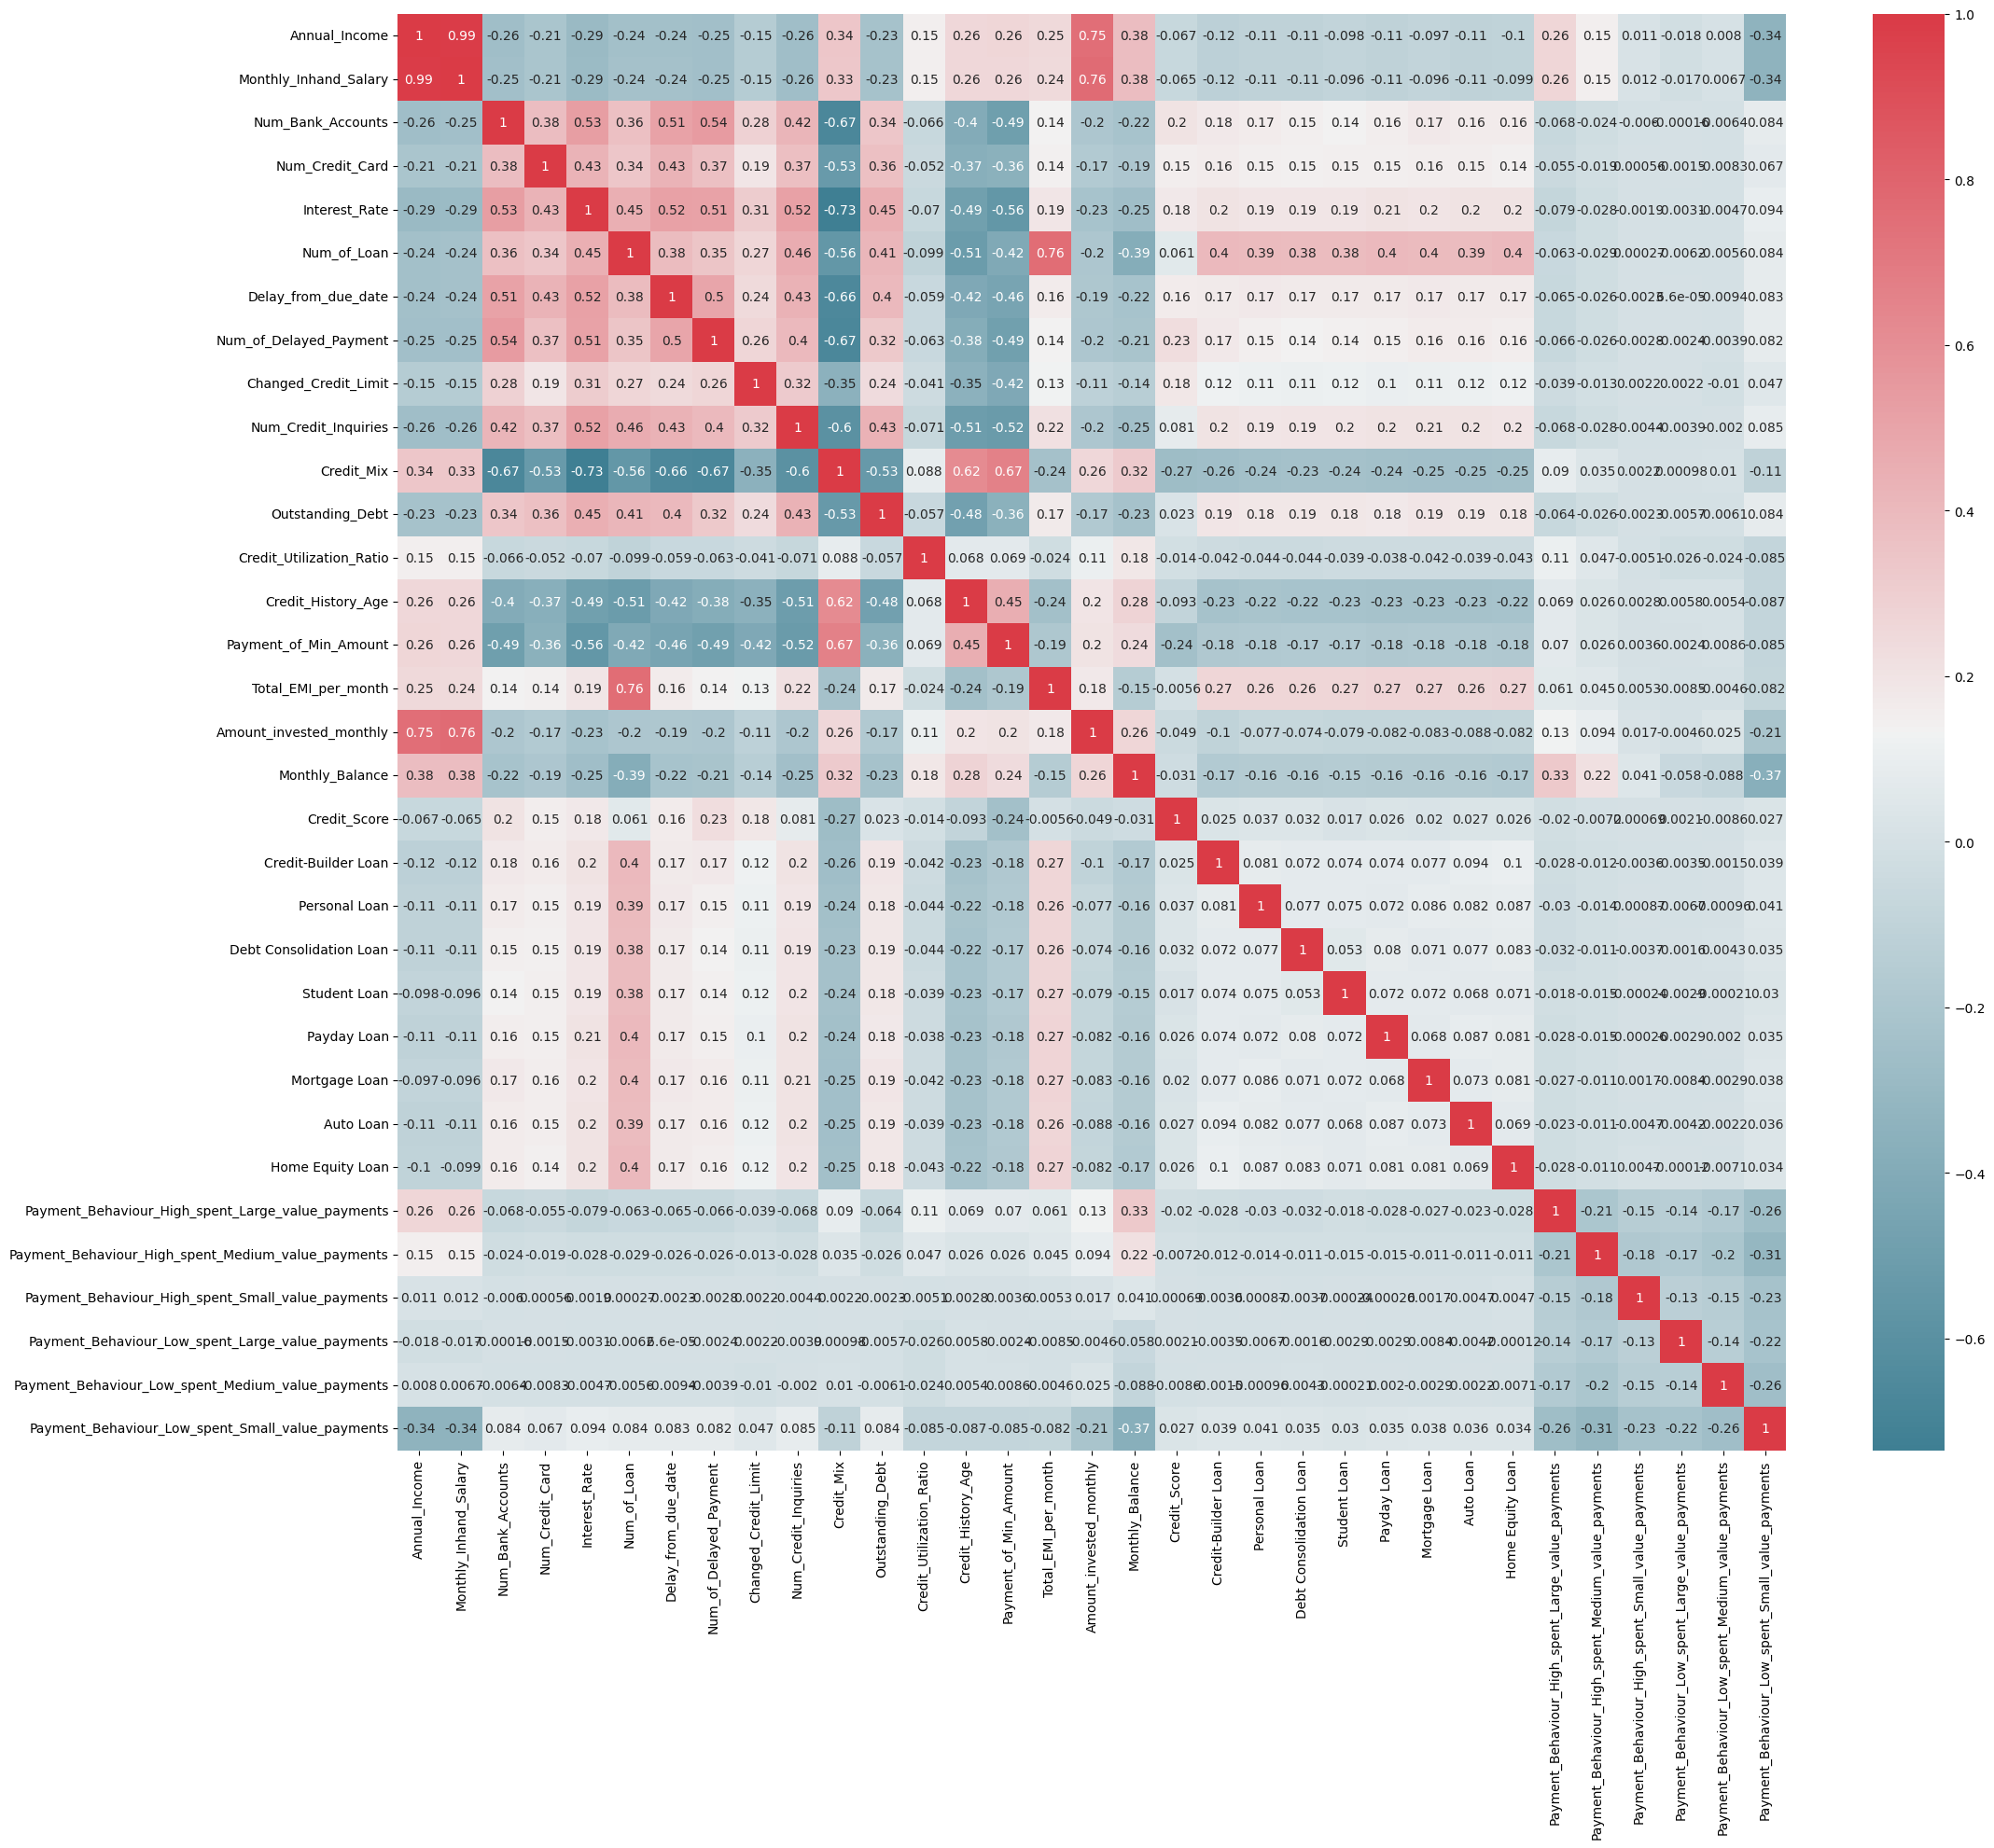

In [ ]:
import seaborn as sns
plt.figure(figsize=(24,20))
cmap = sns.diverging_palette(220, 10, center='light', as_cmap=True)
sns.heatmap(data = data.corr(),annot=True,cmap=cmap)

#### **From the co-relation chart it is evident that tnhere is high relation between Annual Income and Monthly Inhand Salary. Hence we can drop any one of the. Drop Monthly Inhand Salary.**

In [ ]:
data.drop('Monthly_Inhand_Salary',axis=1,inplace=True)

# Now lets do train_test_split_test and do scaling inside it.

### We have to Data_split: Divide the dataset into train, validation and test sets for model development.

In [ ]:
y = data.Credit_Score
X = data.drop('Credit_Score',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_temp, y_test_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

#### Performing standard scaling to reduce the burden on the system due to high data weightage and also give prefference to lower data like age in terms of high values like Monthly Income.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_temp=sc.fit_transform(X_train_temp)
X_test_temp=sc.fit_transform(X_test_temp)
X_val=sc.fit_transform(X_val)
X_test=sc.fit_transform(X_test)